# TensorFlow
- สร้าง Neural Network Model โดยใช้ TensorFlow & Keras<br>
- Dataset: Breast Cancer, 2 Features
- Binary Classification

## Check Environment and TensorFlow


In [1]:
!conda info


     active environment : base
    active env location : C:\Users\DELL\anaconda3
            shell level : 1
       user config file : C:\Users\DELL\.condarc
 populated config files : C:\Users\DELL\.condarc
          conda version : 22.9.0
    conda-build version : 3.22.0
         python version : 3.9.13.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\DELL\anaconda3  (writable)
      conda av data dir : C:\Users\DELL\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache : C:\Users\DELL\

In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\dell\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [3]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [4]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
# cancer.target[:15]
cancer.target[40:50]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [10]:
df = pd.DataFrame(cancer.data[:,0:2], columns=cancer.feature_names[0:2])    # 2 Features

# df = pd.DataFrame(cancer.data[:,0:4], columns=cancer.feature_names[0:4])  # 4 Features

df['class'] = cancer.target

df.sample(5, random_state=1)
# df.head()
df.tail()

,mean radius,mean texture,class
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0
568,7.76,24.54,1


In [11]:
df.describe().round(2)

,mean radius,mean texture,class
count,569.00,569.00,569.00
mean,14.13,19.29,0.63
std,3.52,4.30,0.48
min,6.98,9.71,0.00
25%,11.70,16.17,0.00
50%,13.37,18.84,1.00
75%,15.78,21.80,1.00
max,28.11,39.28,1.00


In [ ]:
df.groupby('class').count()

Convert class to string

In [12]:
# df['class'] = np.where(df['class']==0, 'yes', 'no')  
# df['class'] = np.where(df['class']==0, 'malignant', 'benign') 

target_map = {0:'malignant', 1:'benign'}  # ได้ผลลัพธ์เหมือนด้านบน
df['class'] = df['class'].map(target_map)

# df.head()
df.sample(5, random_state=1)

,mean radius,mean texture,class
421,14.69,13.98,benign
47,13.17,18.66,malignant
292,12.95,16.02,benign
186,18.31,18.58,malignant
414,15.13,29.81,malignant


In [13]:
df.head()
# df.tail()

,mean radius,mean texture,class
0,17.99,10.38,malignant
1,20.57,17.77,malignant
2,19.69,21.25,malignant
3,11.42,20.38,malignant
4,20.29,14.34,malignant


In [ ]:
df.tail()

In [ ]:
df.isnull().sum()

## Data visualization

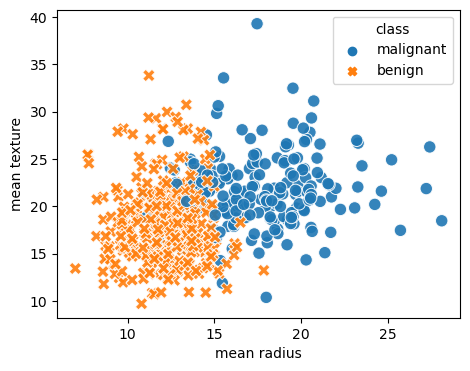

In [14]:
plt.figure(figsize=(5.2, 4))

sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)

plt.show()

## Label Encoding

In [15]:
# y, class_names = pd.factorize(df['class'], sort=True)   # use Pandas
y, class_names = pd.factorize(df['class'])
class_names

Index(['malignant', 'benign'], dtype='object')

In [16]:
y[40:50]
# y[:15]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [17]:
# class_names, y = np.unique(df['class'], return_inverse=True)  # use Numpy
# class_names

In [18]:
print('Class 0:', len(y[y==0]))
print('Class 1:', len(y[y==1]))

Class 0: 212
Class 1: 357


In [19]:
np.unique(y)

array([0, 1], dtype=int64)

## X and y

In [20]:
X = df.drop('class', axis=1)
X.head()
X.tail()

,mean radius,mean texture
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33
568,7.76,24.54


In [21]:
# if label Encoding, skip this command
# y = df['class']     # กรณี: ไม่ทำ Label Encoding. 

In [22]:
y[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
np.unique(y)

array([0, 1], dtype=int64)

## Feature Scaling using StandardScaler 

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       [-0.76890929,  0.25373211],
       [ 1.75029663, -1.15181643]])

In [25]:
cancer.feature_names[0:2]    # ชื่อ columns 2 features แรก

array(['mean radius', 'mean texture'], dtype='<U23')

In [26]:
dfsc = pd.DataFrame(X_sc, columns=['mean radius','mean texture']) #  
# dfsc = pd.DataFrame(X_sc, columns=cancer.feature_names[0:2])  # หรือแบบนี้ก็ได้
dfsc['class'] = y

dfsc.describe().round(3)

,mean radius,mean texture,class
count,569.000,569.000,569.000
mean,-0.000,0.000,0.627
std,1.001,1.001,0.484
min,-2.030,-2.229,0.000
25%,-0.689,-0.726,0.000
50%,-0.215,-0.105,1.000
75%,0.469,0.584,1.000
max,3.971,4.652,1.000


In [ ]:
dfsc.head()

## KDE plot

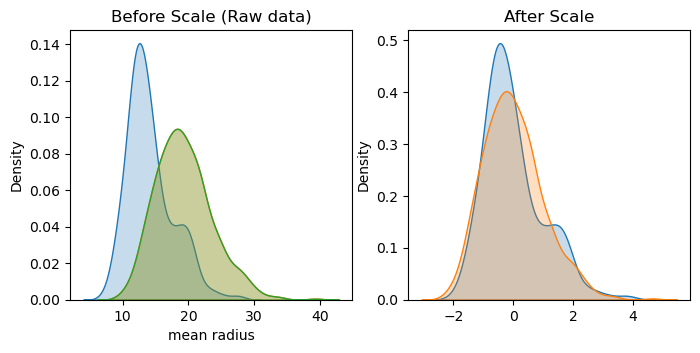

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))

ax1.set_title('Before Scale (Raw data)')
sns.kdeplot(df['mean radius'], fill=True, ax=ax1)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

ax2.set_title('After Scale')
sns.kdeplot(X_sc[:,0], fill=True, ax=ax2)
sns.kdeplot(X_sc[:,1], fill=True, ax=ax2)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

plt.show()

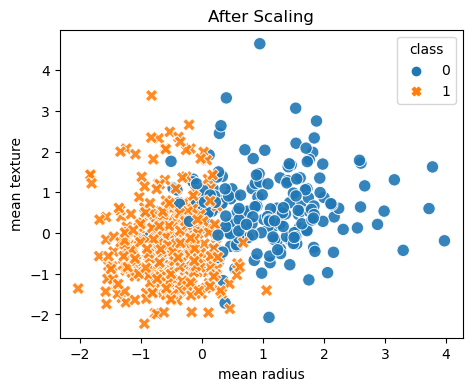

In [28]:
plt.figure(figsize=(5.2, 4))

sns.scatterplot(x='mean radius', y='mean texture', data=dfsc, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)
plt.title('After Scaling')
plt.show()

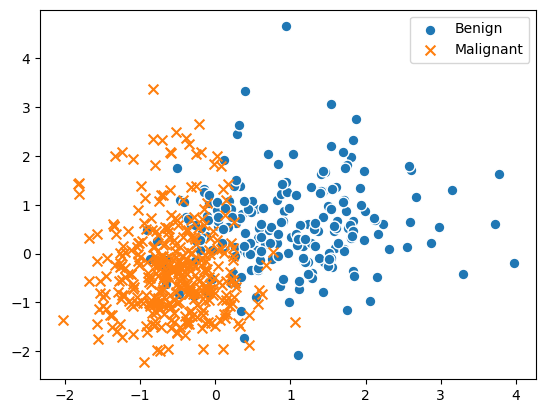

In [29]:
# use  Scatter; Matplotlib
plt.scatter(X_sc[:,0][y==0], X_sc[:,1][y==0], marker='o', edgecolor='w', s=60, label='Benign')
plt.scatter(X_sc[:,0][y==1], X_sc[:,1][y==1], marker='x', s=50, label='Malignant')
plt.legend()
plt.show()

## Train-test Split

In [30]:
X_sc[:5]

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       [-0.76890929,  0.25373211],
       [ 1.75029663, -1.15181643]])

In [31]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) #

X_train.shape, X_test.shape

((426, 2), (143, 2))

In [33]:
y_train.shape, y_test.shape 

((426,), (143,))

In [34]:
X_train[:5]

array([[ 0.31034466,  2.63664885],
       [ 0.23650097, -0.04413248],
       [ 0.15697699,  0.19555543],
       [-1.0813249 , -0.68407594],
       [-0.64678318, -0.42577149]])

In [35]:
y_train[:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [36]:
## Training set (class 0 & 1)
print('Train; Class 0:', len(y_train[y_train==0]))
print('Train; Class 1:', len(y_train[y_train==1]))
print('Total:',len(y_train))

Train; Class 0: 157
Train; Class 1: 269
Total: 426


## Model

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input 

In [38]:
X_train.shape

(426, 2)

In [39]:
input_size = X_train.shape[-1]     # input size
input_size

2

### Create a Model

In [70]:
# Sequential Model using Input
model = Sequential()

# model.add(Input(shape=(2,)))
model.add(Input(shape=(input_size,)))

model.add(Dense(32, activation='relu'))  
model.add(Dense(128, activation='relu'))  
model.add(Dense(128, activation='relu'))  
model.add(Dense(32, activation='relu'))  
model.add(Dense(32, activation='relu'))  

model.add(Dense(1, activation='sigmoid'))   # 2 class (Binary classification)

In [41]:
# Sequential Model  (ไม่ใช้ Input แต่กำหนดที่ Dense Layer)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(2,)))  
# model.add(Dense(32, activation='relu', input_shape=(input_size,) ))   # 

model.add(Dense(1, activation='sigmoid')) # 

In [42]:
# หรือแบบนี้
# input_size = X_train.shape[-1]
# model = Sequential([
#     Dense(32, activation='relu', input_shape=(input_size,)),
#     Dense(1, activation='sigmoid')
# ])

In [ ]:
 # Functional Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

inputs = Input(shape=(2,))    

x = Dense(32, activation="relu")(inputs)

outputs = Dense(1, activation="relu")(x)

model = Model(inputs=inputs, outputs=outputs, name="my_model")
model.summary()

### Model Info

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                96        
                                                                 
 dense_9 (Dense)             (None, 128)               4224      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 32)                4128      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 26,049
Trainable params: 26,049
Non-trai

In [72]:
model.output_shape

(None, 1)

In [73]:
model.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_3'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_8',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_9',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'conf

In [ ]:
# !pip install pydotplus
# ติดตั้ง Graphviz (https://graphviz.org/download) และ set path (Windows)

In [55]:
# ถ้ารันไม่ได้ ให้ใช้ Colab แทน
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Compile

In [74]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Train

In [75]:
import time

start = time.time()
history = model.fit(X_train, y_train, epochs=40, verbose=1, batch_size=32, validation_split=0.25) # 10 +10 40 100
end = time.time()

print(f"Time Taken {end - start:.3f} secs")
print("Time Taken: {:.3f} secs".format(end - start))

Epoch 1/40
10/10 [==============================] - 4s 51ms/step - loss: 0.6114 - accuracy: 0.8966 - val_loss: 0.5197 - val_accuracy: 0.8879
Epoch 2/40
10/10 [==============================] - 0s 14ms/step - loss: 0.4121 - accuracy: 0.9185 - val_loss: 0.3356 - val_accuracy: 0.9065
Epoch 3/40
10/10 [==============================] - 0s 13ms/step - loss: 0.2510 - accuracy: 0.9185 - val_loss: 0.2504 - val_accuracy: 0.9065
Epoch 4/40
10/10 [==============================] - 0s 15ms/step - loss: 0.2177 - accuracy: 0.9154 - val_loss: 0.2403 - val_accuracy: 0.9065
Epoch 5/40
10/10 [==============================] - 0s 20ms/step - loss: 0.2120 - accuracy: 0.9154 - val_loss: 0.2333 - val_accuracy: 0.9065
Epoch 6/40
10/10 [==============================] - 0s 18ms/step - loss: 0.2014 - accuracy: 0.9154 - val_loss: 0.2268 - val_accuracy: 0.9065
Epoch 7/40
10/10 [==============================] - 0s 13ms/step - loss: 0.1951 - accuracy: 0.9185 - val_loss: 0.2222 - val_accuracy: 0.9065
Epoch 8/40
10

## Loss and Accuracy Curves

In [76]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 10}

In [77]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

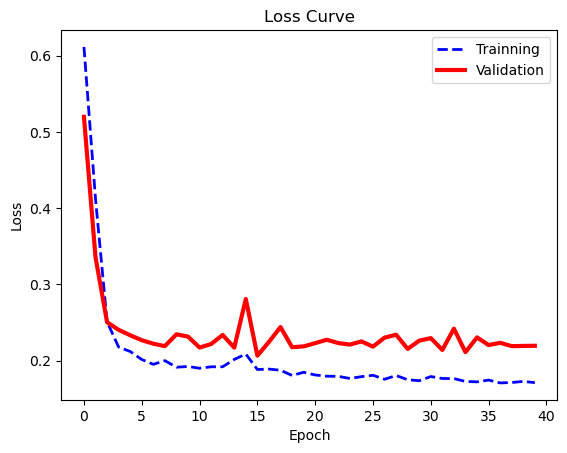

In [78]:
# plt.figure(figsize=(4.7, 3.5))

plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Curve')
plt.show()

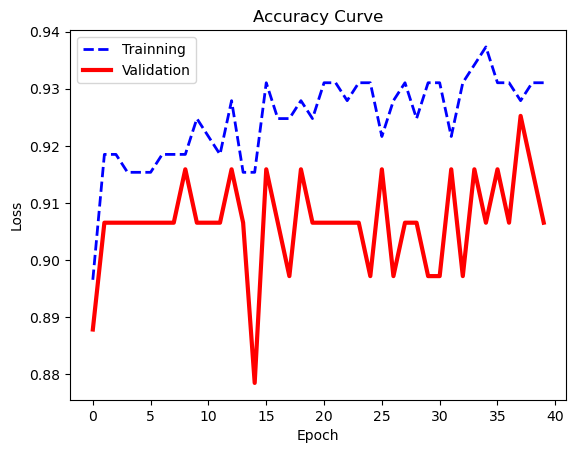

In [79]:
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

### Loss and Accuracy (2-Column curve)

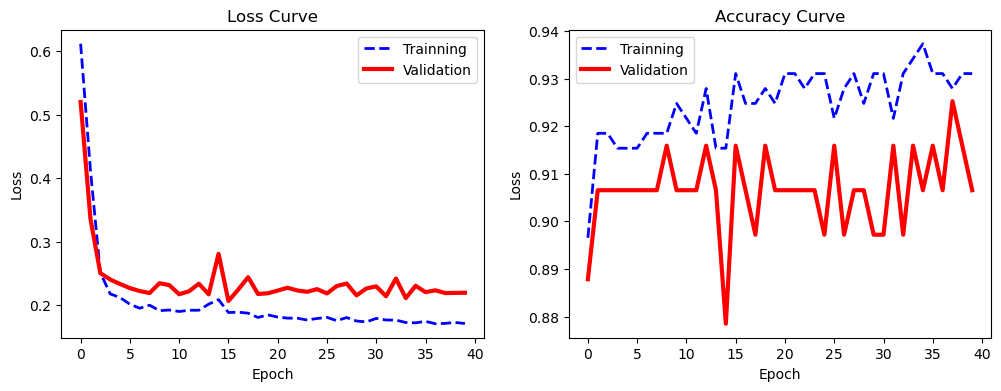

In [80]:
# 2 Columns
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)   # row column index
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')
plt.title('Loss Curve')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)   # row column index
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [62]:
Image(filename='images/ch09 Tensorflow/DL 20220506 144438.png')

NameError: name 'Image' is not defined

## Tensor board

In [63]:
from keras.callbacks import TensorBoard

history = model.fit(X_train, y_train, epochs=40, verbose=0, 
                    batch_size=32, validation_split=0.25,
                    callbacks=[TensorBoard(log_dir='./log')])  


In [64]:
%load_ext tensorboard
# %reload_ext tensorboard
%tensorboard --logdir ./log

## Evaluate
- epochs=10, Hidden=32, accuracy: 0.8252
- epochs=20 (train +10), Hidden=32, accuracy: 0.85
- epochs=40, Hidden=32, accuracy: 0.86

In [81]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.41015246510505676
Test accuracy: 0.8531


In [82]:
y_pred_pr = model.predict(X_test)
y_pred_pr[:4]

5/5 [==============================] - 1s 5ms/step


array([[0.95675635],
       [0.9094986 ],
       [0.94281936],
       [0.00177184]], dtype=float32)

In [ ]:
Image(filename='images/ch09 Tensorflow/DL 20220506 143228.png')

In [67]:
y_pred = (y_pred_pr > 0.5).astype(int)  
# y_pred = np.where(y_pred_pr > .5, 1,0)

y_pred[:4]

array([[1],
       [1],
       [1],
       [0]])

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

print('Score->',score[1])

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Score-> 0.8531468510627747
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        55
           1       0.87      0.89      0.88        88

    accuracy                           0.85       143
   macro avg       0.84      0.83      0.84       143
weighted avg       0.85      0.85      0.85       143

[[43 12]
 [10 78]]


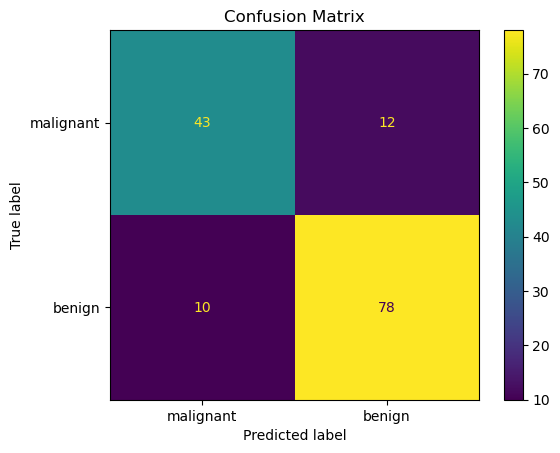

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)   ## <-- 
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

## Decision Regions

9600/9600 [==============================] - 30s 3ms/step


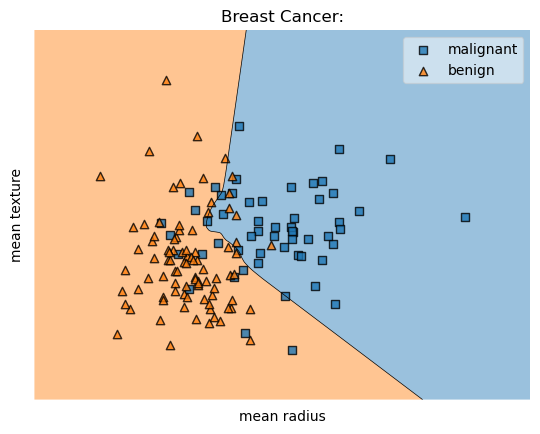

In [85]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X_test, y_test, clf=model)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Breast Cancer:') 
plt.xticks([])
plt.yticks([])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

## Predict

In [86]:
# X_new = [[16.4, 14.1]] #
X_new = [[16.4, 14.1],  # 
         [18.5, 15.1]] #

X_new_sc = sc.transform(X_new)
X_new_sc

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.64548141, -1.20766604],
       [ 1.24191122, -0.97495933]])

In [87]:
y_pred_pr = model.predict(X_new_sc)
y_pred_pr

1/1 [==============================] - 0s 85ms/step


array([[0.80918145],
       [0.26015192]], dtype=float32)

In [88]:
y_pred = (y_pred_pr > 0.5).astype(int) 
y_pred

array([[1],
       [0]])

In [89]:
y_pred = y_pred.reshape(1,-1)[0]
y_pred

array([1, 0])

In [90]:
print(class_names[y_pred])

Index(['benign', 'malignant'], dtype='object')


In [ ]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X_test, y_test, clf=model)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Breast Cancer: New data points')
plt.xticks([])
plt.yticks([])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

plt.scatter(X_new_sc[:,0][y_pred==0], X_new_sc[:,1][y_pred==0], marker='s', s=200, c='b')
plt.scatter(X_new_sc[:,0][y_pred==1], X_new_sc[:,1][y_pred==1], marker='^', s=320, c='r') # 

plt.show()

8418/9600 [=========================>....] - ETA: 3s

# Save Model

In [ ]:
model.save('./mymodel.h5')

In [ ]:
model.save('./mymodel1')

# Save Feature Scaler

In [ ]:
import pickle
pickle.dump(sc, open('./scaler.pkl','wb'))

# Save Classnames

In [ ]:
file_name = "classname.pkl"

open_file = open(file_name, "wb")
pickle.dump(class_names, open_file)
open_file.close()

In [ ]:
class_names

# Load Model & Feature Scaler

In [ ]:
from tensorflow.keras.models import load_model

my_model = load_model('./mymodel.h5') 

In [ ]:
my_model.summary()

In [ ]:
from tensorflow.keras.models import load_model

new_model = load_model('./mymodel1')

In [ ]:
model = new_model

In [ ]:
# List all weight tensors 
model.get_weights()

# Load Feature Scaler

In [ ]:
import pickle
sc2 = pickle.load(open('./scaler.pkl','rb'))

In [ ]:
file_name = "classname.pkl"
open_file = open(file_name, "rb")
class_names = pickle.load(open_file)
open_file.close()

class_names

In [ ]:
X_new = [[16.4, 14.1]] # 
X_new = [[16.4, 14.1],  # 
         [18.5, 15.1],
         [17.7, 18.7]] #

X_new_sc = sc2.transform(X_new)

In [ ]:
y_pred_pr = my_model.predict(X_new_sc)
y_pred = (y_pred_pr > 0.5).astype(int) 
y_pred

In [ ]:
print(class_names[y_pred])

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

y = y_pred.reshape(1, -1)[0]

ax = plot_decision_regions(X_new_sc, y, clf=my_model)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Breast Cancer (from saved model)') 
# plt.xticks([])
plt.yticks([])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

plt.scatter(X_new_sc[:,0][y==0], X_new_sc[:,1][y==0], marker='s', s=150, c='b')
plt.scatter(X_new_sc[:,0][y==1], X_new_sc[:,1][y==1], marker='^', s=150, c='r')
plt.show()

# Summary
- Instance Model (create a model)
- Add Layers
- Compile
- Train

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(2,)))     # 
model.add(Dense(1, activation='sigmoid')) # 

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40, verbose=1, batch_size=32, validation_split=0.25)  
# verbose=1 with progrss bar
# history = model.fit(X_train, y_train, epochs=40, verbose=1, batch_size=32, validation_split=0.25)

In [ ]:
# ดูสรุป model

model.summary()

model.output_shape

model.get_config()

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)   # plot model structure
